# Polynomial Interpolation
本作業將會用幾個polynomial做測試。  
測試函數：$f(x)=\sin(x)$, for $x$ in range $[0,1]$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BarycentricInterpolator
## 這邊只有barycentric方法有現成的function可以用

In [40]:
f = np.sin
x_nodes = np.linspace(0, 1, 30)   # 10 個等距節點
y_nodes = f(x_nodes)

x_plot = np.linspace(0, 1, 500)
y_true = f(x_plot)


## 1. Newton's method
$$\prod_n(x)=\sum_{i=0}^{n}C_i\prod_{k=0}^{i-1}(x-x_k)$$
Here, $\{C_i\}$ can be evaluated using Newton's divided difference.

In [41]:
# Evaluate the {C_i} coefficient
def divided_differences(x, y):
    n = len(x)
    coef = np.copy(y).astype(float)
    for j in range(1, n):
        coef[j:] = (coef[j:] - coef[j-1:-1]) / (x[j:] - x[:n-j])
    return coef

def newton_eval(x_nodes, coef, x):
    n = len(coef)
    p = coef[-1]
    for k in range(n-2, -1, -1):
        p = p * (x - x_nodes[k]) + coef[k]
    return p

coef_newton = divided_differences(x_nodes, y_nodes)
y_newton = [newton_eval(x_nodes, coef_newton, xx) for xx in x_plot]


## 2. Lagrannge interpolation polynomial
We set $$\displaystyle l_i(x)=\frac{\displaystyle\prod _{j\neq i}(x-x_j)}{\displaystyle\prod _{j\neq i}(x_i-x_j)}$$
Then, we have $$\prod _{n}(x)=\sum _{i=0}^{n}y_{i}l_{i}(x)$$

In [42]:
def lagrange_interp(x_nodes, y_nodes, x):
    n = len(x_nodes)
    total = 0
    for i in range(n):
        xi, yi = x_nodes[i], y_nodes[i]
        term = yi
        for j in range(n):
            if i != j:
                term *= (x - x_nodes[j]) / (xi - x_nodes[j])
        total += term
    return total

y_lagrange = [lagrange_interp(x_nodes, y_nodes, xx) for xx in x_plot]

## 3. Modified Lagrange interpolation polynomial
When adding a point, it becomes hard to evaluate the $l_i(x)$ part in Lagrange interpolation polynomial.
Hence, we set $W_{n+1}(x)$ as $$W_{n+1}(x)=\prod _{i=0}^{n}(x-x_i)$$ and $$w_{i}(x)=\frac{1}{\displaystyle\prod_{j\neq i}(x_i-x_j)}$$
Therefore, we can write $$\prod _{n}(x)=W_{n+1}(x)\sum _{i=0}^{n}y_i\frac{w_i}{x-x_i}$$

In [43]:
def modified_lagrange_weights(x_nodes):
    n = len(x_nodes)
    w = np.ones(n)
    for j in range(n):
        for k in range(n):
            if j != k:
                w[j] /= (x_nodes[j] - x_nodes[k])
    return w

def modified_lagrange_eval(x_nodes, y_nodes, w, x):
    numerator = 0
    denominator = 0
    for j in range(len(x_nodes)):
        if x == x_nodes[j]:
            return y_nodes[j]
        term = w[j] / (x - x_nodes[j])
        numerator += term * y_nodes[j]
        denominator += term
    return numerator / denominator

w = modified_lagrange_weights(x_nodes)
y_modlagrange = [modified_lagrange_eval(x_nodes, y_nodes, w, xx) for xx in x_plot]


## 4. Barycentric Lagrange polynomial
Since $$1=\sum_{i=0}^{n}l_i(x)=W_{n+1}(x)\sum_{i=0}^{n}\frac{w_i}{x-xi},$$ we have $$W_{n+1}(x)=\frac{1}{\displaystyle\sum_{i=0}^{n}\frac{w_i}{x-x_i}}.$$
Hence, $$\prod_n(x)=\frac{\displaystyle\sum_{i=0}^{n}\frac{w_i}{x-x_i}y_i}{\displaystyle\sum_{i=0}^{n}\frac{w_i}{x-x_i}}$$

In [44]:
bary = BarycentricInterpolator(x_nodes, y_nodes)   ## 有現成ㄉ
y_bary = bary(x_plot)

# 畫圖比較

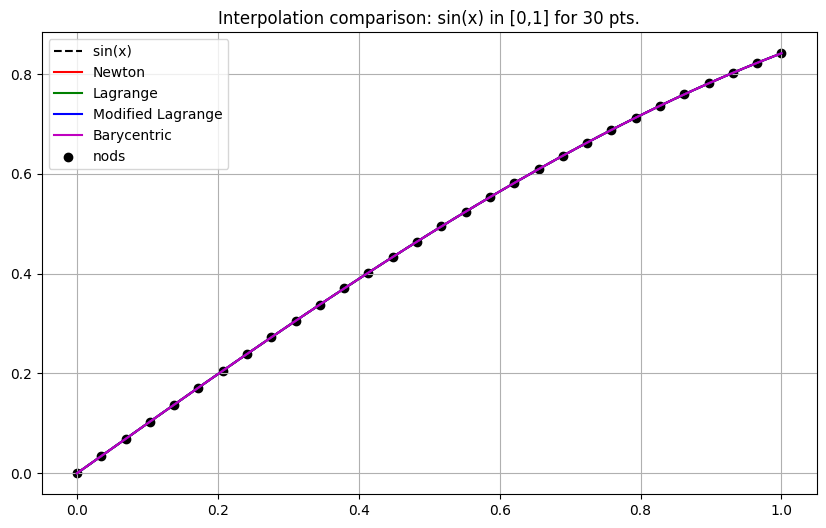

In [46]:
plt.figure(figsize=(10,6))
plt.plot(x_plot, y_true, "k--", label="sin(x) ")
plt.plot(x_plot, y_newton, "r-", label="Newton")
plt.plot(x_plot, y_lagrange, "g-", label="Lagrange")
plt.plot(x_plot, y_modlagrange, "b-", label="Modified Lagrange")
plt.plot(x_plot, y_bary, "m-", label="Barycentric")
plt.scatter(x_nodes, y_nodes, c="k", marker="o", zorder=0.5, label="nods")
plt.legend()
plt.title("Interpolation comparison: sin(x) in [0,1] for 30 pts.")
plt.grid(True)
plt.show()

# 結論
在作業的要求下好像看不太出這四個algorithm的差別。